In [1]:
# imports go here
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

---
#### CS 260 Database and Data Visualizsation - Final Project - SP24
---

# Global Superstore Data

### By: Jacob Schaeffer, John Murphy, Alex Chase


---

## 1. Introduction

"Global Superstores" are retail giants that maintain an international presenece with an extensive product range. In addition to the physical locations, Global Superstores also maintain an online presence that allows for a increased retail presence. Paired with competitive price matching, Global Superstores generate hundreds of millions of dollars annually. With such an expansive data set, our group was able to analyze trends and correlations amongst the top global retailers.

The aim of this project is to draw correlations regarding the following: who are the global leaders when it comes to purchasing? Which categories yield the highest profit margins? Does the amount of sales have any correlation with shipping cost? Does the global economy play a factor in purchases?

Ultimately, our group discovered that the United States is a leaeder in purchasing from global super stores but falls short when leading in the global markets. Additionally, we discovered that of the three product categories, technology yielded the most varience in profit margins. While it was close to office supplies and furniture, technology had some of the highest and lowest returns. Finally, our group found that there is an extremely weak correlation between inflation rates and store sales. Our group assesses that this may be due to the facts that most of these purchases come from companies with an extensive payroll.

---

## 2. Data

A direct link to the data can be found at the following website.


The developers of the dataset did not provide much information in the main file as to how the data was collected. However, after seeing where they sourced their data from, a vast majority comes from Walmart.


After doing more research as to how Walmart distributes their sales information, we have made the following conclusion: Walmart primarily utilizes point of sale tracking and stores it their own database. This database contains sales from every second at any one of their 5,000 locations.


In [2]:

try:

    csv_data_global_super = pd.read_csv("https://raw.githubusercontent.com/js3889/GlobalSuper/main/Final%20project-superstore.csv")

    csv_data_global_ir1 = pd.read_csv("https://raw.githubusercontent.com/js3889/InflationRate/main/Global%20Dataset%20of%20Inflation.csv")


    conn = sql.connect('GlobalSuper.db')

    csv_data_global_super.to_sql('GlobalSuper', conn, index = False)
    csv_data_global_ir1.to_sql("InflationRate", conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

**Main table we need from our DB is GS.**

In [3]:
sql_statement = """SELECT *
                   FROM globalsuper
                   """

results_gs = pd.read_sql_query(sql_statement, conn)
results_gs

,category,city,country,customer_ID,customer_name,discount,market,order_date,order_id,order_priority,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,00:00.0,CA-2014-109701,High,...,69,Corporate,00:00.0,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,00:00.0,CA-2014-109701,High,...,9,Corporate,00:00.0,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,00:00.0,CA-2014-106964,Medium,...,12,Home Office,00:00.0,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,00:00.0,CA-2014-145219,Critical,...,90,Home Office,00:00.0,First Class,15.95,California,Binders,2014,North America,52


**The Following table will just be used once for supporting JOIN analysis.**

In [4]:
#Show the rows of the table of new table.
sql_statement = """SELECT *
                   FROM InflationRate
                   """

results_ir = pd.read_sql_query(sql_statement, conn)
results_ir

,Country_Code,IMF_Country_Code,Country,Indicator_Type,Series_Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,None,None,None,None,None
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,None,None,None,None,None
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,None,None,None,None,None
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,None,None,None,None,None
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,VEN,299.0,"Venezuela, RB",Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",None,None,None,None,None
779,VNM,582.0,Vietnam,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",None,None,None,None,None
780,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.93,-0.58,4.92,NaN,"Producer Price Index, All Commodities",None,None,None,None,None
781,ZAF,199.0,South Africa,Inflation,Producer Price Inflation,NaN,5.00,6.35,12.44,18.58,...,4.62,2.49,7.12,14.36,"Producer Price Index, All Commodities",None,None,None,None,None


**Using an inner join on country to create new table.**

In [5]:
#Show the rows of the newly joined table.
sql_statement = """SELECT *
                   FROM InflationRate AS ir
                   INNER JOIN GlobalSuper AS gs
                   ON ir.Country = gs.Country


                   """

results_ir1 = pd.read_sql_query(sql_statement, conn)
results_ir1

,Country_Code,IMF_Country_Code,Country,Indicator_Type,Series_Name,1970,1971,1972,1973,1974,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,732,Home Office,00:00.0,Standard Class,39.66,Hirat,Bookcases,2014,APAC,12
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,170,Home Office,00:00.0,Standard Class,11.01,Hirat,Furnishings,2014,APAC,12
2,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,85,Consumer,00:00.0,Second Class,8.73,Kabul,Furnishings,2014,APAC,28
3,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,220,Consumer,00:00.0,First Class,36.24,Kabul,Furnishings,2011,APAC,49
4,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,417,Consumer,00:00.0,Standard Class,58.04,Kabul,Chairs,2013,APAC,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230999,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,14.29,0.00,4.17,12.00,10.71,...,318,Home Office,00:00.0,Standard Class,29.43,Lusaka,Copiers,2014,Africa,9
231000,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,14.29,0.00,4.17,12.00,10.71,...,1247,Consumer,00:00.0,Standard Class,81.60,Copperbelt,Machines,2012,Africa,14
231001,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,14.29,0.00,4.17,12.00,10.71,...,504,Consumer,00:00.0,Standard Class,43.49,Copperbelt,Phones,2012,Africa,14
231002,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,14.29,0.00,4.17,12.00,10.71,...,83,Home Office,00:00.0,Second Class,19.89,Copperbelt,Accessories,2013,Africa,37


### 2.1 Summary of Variables within the GlobalSuper Table

The Global Superstore Data table has 26 columns/variables and 51290 rows.  All variables are explained in this section. There are 3 variables that are not on the list that follows. Region, order_date, and ship_date. For both the date variables, we had trouble uploading the csv file into Github, so it only shows 00:00.0 for both the date columns. Region is just a substitute for state in this dataset, since region and state are interchangable internationally.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "Global Superstore (
        "category" TEXT,
        "city" TEXT,
        "country" TEXT,
        "customer_id" TEXT,
        "customer_name" TEXT,
        "discount" Integer,
        "Market" TEXT,
        "order_id" TEXT,
        "order_priority" TEXT,
        "product_id" TEXT,
        "product_name" TEXT,
        "profit" REAL,
        "quantity" INTEGER,
        "row_id" INTEGER,
        "sales" INTEGER,
        "segment" TEXT,
        "ship_mode" TEXT,
        "shipping_cost" REAL,
        "state" TEXT,
        "sub_category" TEXT,
        "year" INTEGER,
        "market2" INTEGER,
        "weeknum" INTEGER
        PRIMARY KEY ("customer_id")
        
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

**CATEGORICAL VARIABLES**

* **Category** – The category of products sold in the superstore.
    * Number of missing values:0
    * Contains 3 distinct values: office supplies, Technology, Furniture
        * The products will fall into different categories based on their uses. Example: a chair would fall into the Furniture category.   
* **City** – The city where the order was placed.
    * Number of missing values:0
    * Contains 4636 distinct values: Los Angeles, San Francisco, San Diego         
* **Country** – The country in which the superstore is located.
    * Number of missing values:0
    * Contains 147 distinct values: U.S.A, France, Germany, Peru    
* **Customer_id** – Id number of the customer.
    * Number of missing values:0
    * Units:
    * Contains 4873 distinct values:LS-172304, MV-174854
        * Each customer has a customer_id assigned to them, to keep track of them.      
* **Customer_name** – The name of the customer who placed the order.
    * Number of missing values:0
    * Contains 795 distinct values:Lycorris Saunders, Chad Sievert    
* **Market** – The market/region where the store operates.
    * Number of missing values:0
    * Contains 6 distinct values:US,EU,LATAM,APAC,EMEA,Canada
        * This column represents economic markets.
* **Order_id** – Unique identifier for each other
    * Number of missing values:0
    * Contains 25035 distinct values: CA-2011-130813, CA-2011-148614
* **Order_priority** – The priority level of the order
    * Number of missing values:0
    * Contains 4 distinct values:High, medium, critical, low
        * A order with a critical priority woul let distributors know that they have to get the order to the customer as soon as possible.
* **Product_id** – A unique identifier for each product
    * Number of missing values:0
    * Contains 10292 distinct values: OFF-PA-10002005, TEC-PH-10001949
    * A number is assigned to each product, there is an abreviation for the products category and its subsequent sub-category.
* **Product_name** – The name of the product.
    * Number of missing values:0
    * Contains 3788 distinct values: Xerox 225,Xerox 1913,Xerox 223
* **Row_id** – Unique identifier for each row
    * Number of missing values:0
    * Contains 51290 distinct values: 33567, 33678
* **Segment** – What segment the customer falls into.
    * Number of missing values:0
    * Contains 3 distinct values:Consumer, Home Office, Corporate
        * A consumer is an individual buying for themselves, a Home office is someone who is working from home for a buisness, and Corporate is the business themselves writing the check for the order.
* **Ship_mode** – The shipping mode used for the order.
    * Number of missing values:0
    * Contains 4 distinct values:second class, same day, first class
        * Same day would be delivery on the same day that the order is placed. First class would be higher than second class.
* **State** –  The state or region within the country of the order
    * Number of missing values:0
    * Contains 1094 distinct values:Utah, Nevada, New York, california,Praque
    * It is not only U.S states, but international sub-regions/cities in different countries. So, it's not "state" in the way that we americans recognize the term.
* **Sub_category** – The sub-category of the products in the main category  
    * Number of missing values:0
    * Contains 16 distinct values:Paper,Art, Storage, Appliances
        * The sub-category falls belows the three main categories: Paprer is a sub=category of office supplies, phones is a sub-category for technology etc.
* **Market2** – Another column for market information.
    * Number of missing values:0
    * Contains 6 distinct values:EU,LATAM,Africa,APAC
        * Has the same function that the first market column does, but the values returned are slighty different.

**QUANTITATIVE  DISCRETE VARIABLES**

* **Discount** – The discount applied to the order
    * Number of missing values:0
    * max value: .85
    * min value: 0.0
    * average value:0.142908
* **Profit** – The profit generated from the order
    * Number of missing values:0
    * max value: 8399.976
    * min value: -6599.978
    * average value:28.611
* **Quantity** – The quatity of products ordered
    * Number of missing values:0
    * max value: 14
    * min value: 1
    * average value:3.477
* **Sales** – The total sales for the orders
    * Number of missing values:0
    * max value: 22638
    * min value: 0
    * average value:246,498
    * Any other important facts, should you discover them during your analysis.
* **Shipping_cost** – The cost for of shipping the order
    * Number of missing values:0
    * max value: 933.57
    * min value: 0.002
    * average value:26.3758
* **Weeknum** – The week number the order was placed on
    * Number of missing values:0
    * max value: 53
    * min value: 1
    * average value:31.287
* **Year** – The year in which the order was placed.
    * Number of missing values:0
    * max value: 2014
    * min value: 2011
    * average value:2012.777

### 2.2 Code used to Summarize Variables

#### **Qualitative Categorical**

In [6]:
#This code helps find the unqiue type of product that is purchased from Global Super Store.
#This query provides us with 3 unique categories: Office Supplies, Tech, and Furniture.
sql_statement = """
                    SELECT DISTINCT(category)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,category
0,Office Supplies
1,Technology
2,Furniture


In [7]:
#This code finds the unqiue cities that have from purchased global super stores. With this query,
#we can see there are cities such as LA, San Fransisco, San Deigo, and many more.
sql_statement = """
                    SELECT DISTINCT(city)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,city
0,Los Angeles
1,San Francisco
2,San Diego
3,Roseville
4,Huntington Beach
...,...
3631,Redding
3632,Lake Elsinore
3633,Ontario
3634,Whittier


In [8]:
#This code displays the unqiue contries that have purchased from global super stores.
#Below, we can see some of the distinct countries, such as: US, France, Germany, ETC.
sql_statement = """
                    SELECT DISTINCT(country)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,country
0,United States
1,France
2,Germany
3,El Salvador
4,Guatemala
...,...
142,Honduras
143,Argentina
144,Peru
145,Venezuela


In [9]:
#This code displays the unique customer id's that made purchases from global super stores.
#The customer_ID will be our primary key moving forward.
#Additionally, it can connect us to more information such as the customers name and country.
sql_statement = """
                    SELECT DISTINCT(customer_ID)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,customer_ID
0,LS-172304
1,MV-174854
2,CS-121304
3,AP-109154
4,JF-154904
...,...
4868,RE-194054
4869,PH-187904
4870,JR-157004
4871,CJ-118754


In [10]:
#This code displays the unqiue, individual names of those who made purchases from Global Super Stores.
sql_statement = """
                    SELECT DISTINCT(customer_name)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,customer_name
0,Lycoris Saunders
1,Mark Van Huff
2,Chad Sievert
3,Arthur Prichep
4,Jeremy Farry
...,...
790,Toby Gnade
791,Emily Burns
792,Troy Blackwell
793,Evan Henry


In [11]:
#This code displays the unqiue market ID of those who made purchases from Global Super Stores.
#Rather than displaying the country, now we can see what region the purchase was made in.
#For example, LATAM represnts Latin America.
sql_statement = """
                    SELECT DISTINCT(market)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,market
0,US
1,EU
2,LATAM
3,Africa
4,APAC
5,EMEA
6,Canada


In [12]:
#This code displays the unqiue ID associated with each order.
sql_statement = """
                    SELECT DISTINCT(order_id)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,order_id
0,CA-2011-130813
1,CA-2011-148614
2,CA-2011-118962
3,CA-2011-146969
4,CA-2011-117317
...,...
25030,CA-2014-151071
25031,CA-2014-150609
25032,CA-2014-137085
25033,US-2014-136707


In [13]:
#This code displays the unqiue priorities for shipping.
#Priority ranges anywhere from low to critical.
sql_statement = """
                    SELECT DISTINCT(order_priority)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,order_priority
0,High
1,Medium
2,Critical
3,Low


In [14]:
#This query displays the unique shipping options provided.
#They range anywhere from standard to same day shipping.
sql_statement = """
                    SELECT DISTINCT(ship_mode)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,ship_mode
0,Second Class
1,Standard Class
2,Same Day
3,First Class


In [15]:
#This query not only shows the 50 states, but it also shows international...
#cities and capitols.
sql_statement = """
                    SELECT DISTINCT(state)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,state
0,California
1,New York
2,Washington
3,Nevada
4,Utah
...,...
1089,North Carolina
1090,Arizona
1091,Tennessee
1092,Oregon


In [16]:
#This query breaks down what was ordered into more detail.
#From our category column, we can now see examples of individual products that fall into values.
#For example, under office we can locate labels, binder, copies, etc.
sql_statement = """
                    SELECT DISTINCT(sub_category)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,sub_category
0,Paper
1,Art
2,Storage
3,Appliances
4,Supplies
5,Envelopes
6,Fasteners
7,Labels
8,Binders
9,Accessories


In [17]:
#This query further breaks down the regions of buyers differently than MARKET.
#It can be used as another lense to filter out data.
sql_statement = """
                    SELECT DISTINCT(market2)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,market2
0,North America
1,EU
2,LATAM
3,Africa
4,APAC
5,EMEA


In [18]:
#This query displays the many unique product ID's.
#The ID code is broken into three parts.
#The first three letter represent the category that's being purchased from.
#The 2 letters represnt the subcategory.
#The following numbers represent a unqiue prodcut number.
sql_statement = """
                    SELECT DISTINCT(product_ID)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,product_id
0,OFF-PA-10002005
1,OFF-PA-10002893
2,OFF-PA-10000659
3,OFF-PA-10001144
4,OFF-PA-10002105
...,...
10287,TEC-PH-10001949
10288,TEC-MA-10003246
10289,TEC-MA-10003329
10290,FUR-TA-10001691


In [19]:
#This query displays the thousands of unique products that can be purchased from
#the Global Superstores.
sql_statement = """
                    SELECT DISTINCT(product_name)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,product_name
0,Xerox 225
1,"Wirebound Service Call Books, 5 1/2"" x 4"""
2,"Adams Phone Message Book, Professional, 400 Me..."
3,Xerox 1913
4,Xerox 223
...,...
3783,Cisco SPA 501G IP Phone
3784,Hewlett-Packard Deskjet D4360 Printer
3785,"Vtech AT&T CL2940 Corded Speakerphone, Black"
3786,Barricks Non-Folding Utility Table with Steel ...


In [20]:
#This query just returns the number of rows.
#This is useful if you know where a product is located in the rows.
sql_statement = """
                    SELECT DISTINCT(row_id)
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,row_id
0,36624
1,37033
2,31468
3,31469
4,32440
...,...
51285,33646
51286,33645
51287,32321
51288,35917


#### **Discrete Data**

In [21]:
#This cell displays the min, max, and average discount applied to customer purchases
sql_statement = """
                    SELECT MIN(discount) AS min_discount,
                           MAX(discount) AS max_discount,
                           AVG(discount) AS avg_discount
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_discount,max_discount,avg_discount
0,0.0,0.85,0.142908


In [22]:
#This cell shows that there are zero null values in the discount column.
sql_statement = """
                    SELECT COUNT(*) AS null_discount
                    FROM GlobalSuper
                    WHERE discount IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,null_discount
0,0


In [23]:
#This cell displays the min, max, and average sale from all purchases made.
sql_statement = """
                    SELECT MIN(sales) AS min_sale,
                           MAX(sales) AS max_sale,
                           AVG(sales) AS avg_sale
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_sale,max_sale,avg_sale
0,0,22638,246.49844


In [24]:
#This cell shows that there are zero null values in the sales column.
sql_statement = """
                    SELECT COUNT(*) AS Null_Sales
                    FROM GlobalSuper
                    WHERE sales IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,Null_Sales
0,0


In [25]:
#This cell displays the min, max, and average shipping prices applied to customer purchases.
sql_statement = """
                    SELECT MIN(shipping_cost) AS min_shipping,
                           MAX(shipping_cost) AS max_shipping,
                           AVG(shipping_cost) AS avg_shipping
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_shipping,max_shipping,avg_shipping
0,0.002,933.57,26.375818


In [26]:
#This cell shows that there are zero null values in the shipping cost column.
sql_statement = """
                    SELECT COUNT(*) AS Null_Shipping
                    FROM GlobalSuper
                    WHERE shipping_cost IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,Null_Shipping
0,0


In [27]:
#This cell displays the min, max, and the average year where purchases were made.
#AVG shows us that majority of orders placed was during 2012.
sql_statement = """
                    SELECT MIN(year) AS min_year,
                           MAX(year) AS max_year,
                           AVG(year) AS avg_year
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_year,max_year,avg_year
0,2011,2014,2012.777208


In [28]:
#This cell shows that there are zero null values in the year column.
sql_statement = """
                    SELECT COUNT(year) AS Null_Year
                    FROM GlobalSuper
                    WHERE year IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,Null_Year
0,0


In [29]:
#This cell displays the min, max, and average weeks when purchases were made.
#AVG shows us that majority of orders were placed on week number 31.
#This means majority of order took place around July.
sql_statement = """
                    SELECT MIN(weeknum) AS min_week,
                           MAX(weeknum) AS max_week,
                           AVG(weeknum) AS avg_week
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_week,max_week,avg_week
0,1,53,31.287112


In [30]:
#This cell shows that there are zero null values in the weeknum column.
sql_statement = """
                    SELECT COUNT(*) AS Null_Week
                    FROM GlobalSuper
                    WHERE weeknum IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,Null_Week
0,0


In [31]:
#This cell displays the min, max, and average profit across all purchases.
sql_statement = """
                    SELECT MIN(profit) AS min_profit,
                           MAX(profit) AS max_profit,
                           AVG(profit) AS avg_profit
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_profit,max_profit,avg_profit
0,-6599.978,8399.976,28.610982


In [32]:
#This cell shows that there are zero null values in the profit column.
sql_statement = """
                    SELECT COUNT(*) AS Null_Profit
                    FROM GlobalSuper
                    WHERE profit IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,Null_Profit
0,0


---

In [33]:
#This cell displays the min, max, and average quantity of product purchased
sql_statement = """
                    SELECT MIN(quantity) AS min_quantity,
                           MAX(quantity) AS max_quantity,
                           AVG(quantity) AS avg_quantity
                    FROM GlobalSuper
                """

results = pd.read_sql_query(sql_statement, conn)
results

,min_quantity,max_quantity,avg_quantity
0,1,14,3.476545


In [34]:
#This cell shows that there are zero null values in the quantity column.
sql_statement = """
                    SELECT COUNT(*) AS Null_Quantity
                    FROM GlobalSuper
                    WHERE profit IS NULL
                """

results = pd.read_sql_query(sql_statement, conn)
results

,Null_Quantity
0,0


## 3. Results For Phase 3

**To best display our results, our group decided to start from a macro view, and work our way in. Therefore, we decided that analyzing which countries and markets had the highest amount of purchases was an appropriate starting point.**

**Following the analysis of the top six countries and markets, we then decided it would be beneficial to taper down our results. We then refined our analysis by looking into which specific category yields the highest profit margins.**

**To tie it all together, we then decided it would be best to analyze if large sales equate to higher shipping costs. From the top spender to the price of shipping, we analyzed and drew correlations to help better digeste our data.**

**Our group felt that condutcing analysis from when a country puts in an order, to when the item is shipped, would provide the most thorough analysis possible.**

[link text](https://)

### 3.1 -  Q: What markets and countries purchase the most from global super stores?

This question aims to answer which countries/markets make the most purchases from global superstores. Additionally, it aims to help us understand which markets and countries have a strong correlation.

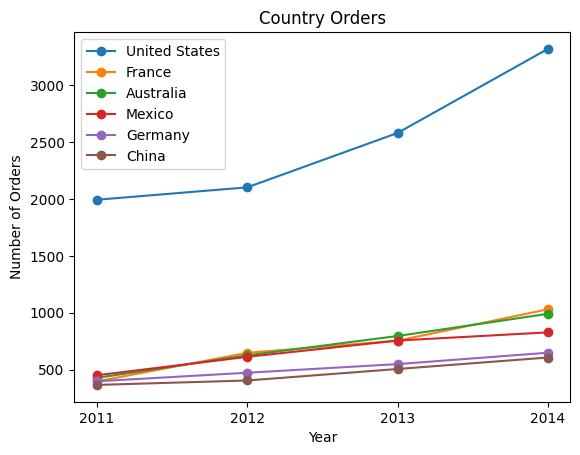

In [35]:
#This graph shows each of the six markets
#It also shows the number or orders in a four year period
#GROUP BY is being used to filter the years into groups.

for country in ['United States','France','Australia','Mexico','Germany', 'China']:

  sql_statement = f"""
                      SELECT year, COUNT(country) AS num_orders
                      FROM GlobalSuper
                      WHERE country = '{country}'
                      GROUP BY year
                  """


  top_six_orders_country = pd.read_sql_query(sql_statement, conn)
  top_six_orders_country

  #Below is the coding for the graph that is shown below
  plt.plot(top_six_orders_country['year'], top_six_orders_country['num_orders'], marker = 'o', label = country)

plt.title('Country Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(2011, 2015, 1))
plt.legend();

As seen in the graph above, the Unite States dominates the in terms of order per country. The United States sits roughly 1500+ orders above other countries across all 4 years.

The cell below justifies the use of the topic six countries. Opposed to displaying all 200+ countries and the amount of orders, our group wanted to refine the data entries to the top 6 to better understand who purchases the most from global superstores. In this scenario, 200+ data entries would not answer the question and create more uncertainty than answers. Additionally, this code clearly displays which countries belong in the topic 6 category.

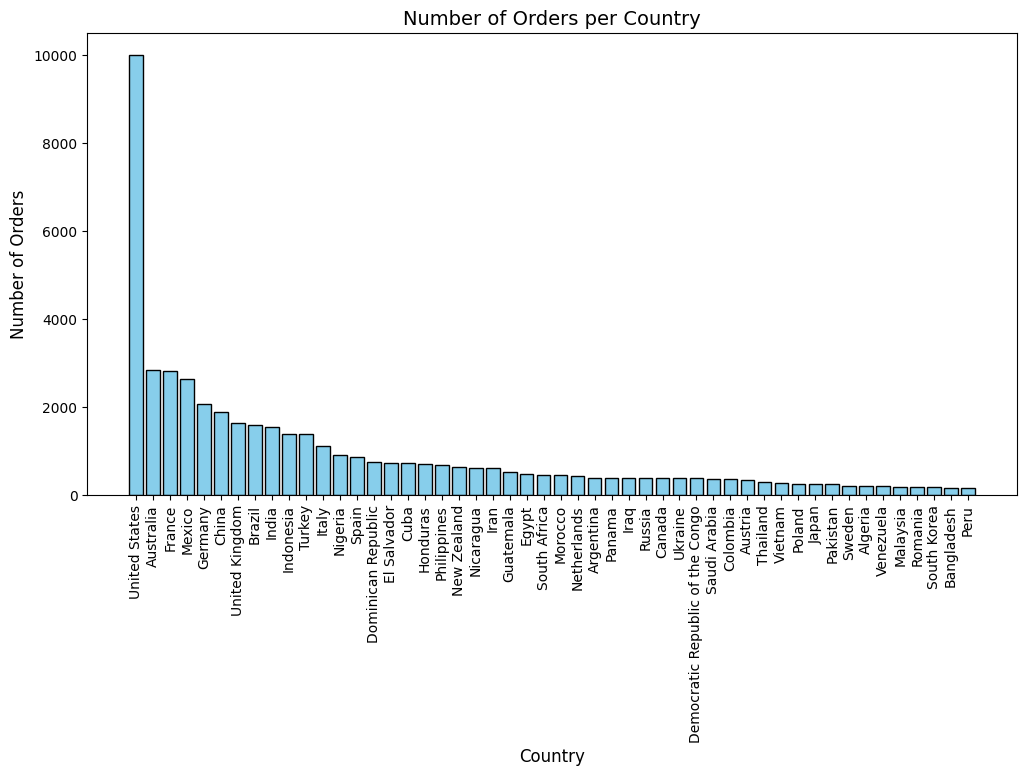

In [36]:
sql_statement = """
                      SELECT country, COUNT(country) AS num_orders
                      FROM GlobalSuper
                      GROUP BY country
                      ORDER BY num_orders DESC
                      LIMIT 50;
                  """


global_orders = pd.read_sql_query(sql_statement, conn)
global_orders

plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(global_orders['country'], global_orders['num_orders'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Country', fontsize=12)  # Decrease font size
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders per Country', fontsize=14)

# Rotating x-axis labels vertically
plt.xticks(rotation=90, ha='center')

# Showing the plot
# Adjust layout to prevent clipping of labels
plt.show();


As seen in the bar chart, as we pass Italy, all of the data entries taper down into very similar numbers. The user does not gain valuable information from these data points, thus why we included the topic 6.

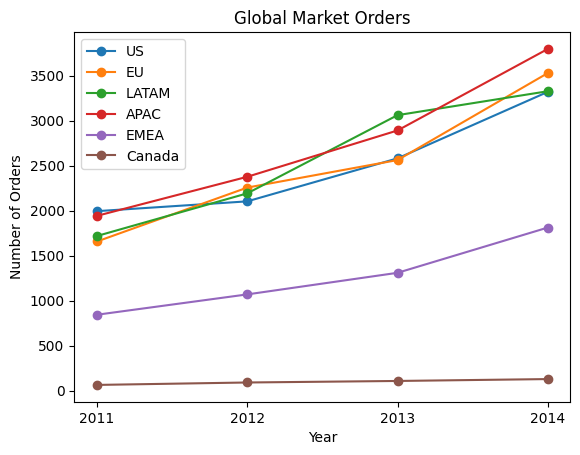

In [37]:
#This graph shows each of the six markets
#It also shows the number or orders in a four year period
for market in ['US','EU','LATAM','APAC','EMEA','Canada']:


  sql_statement = f"""
                      SELECT year, COUNT(market) AS num_orders
                      FROM GlobalSuper
                      WHERE market = '{market}'
                      GROUP BY year
                  """


  top_six_orders_market = pd.read_sql_query(sql_statement, conn)
  top_six_orders_market
  #Below is the coding for the graph that is shown below.

  plt.plot(top_six_orders_market['year'], top_six_orders_market['num_orders'], marker = 'o', label = market)

plt.title('Global Market Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(2011, 2015, 1))
plt.legend()
plt.show();

We can see that the U.S is the leading country in terms of country orders, however it falls short in the global markets. APAC is the leading market even though the largest country in APAC ranks 3rd/6th.

With this information in mind, we can infer that APAC is made up of many more countries than the US, ultimately leading to a larger total order count. Also, another possible reason for this is that this graph is only based on the data from the GlobalSuper dataset, which might just have more data from certain countries compared to other countries.

For Phase 3 Grading:
    
* Who made this graph?  Jake Schaeffer
* Who asked the question?  Jake Schaeffer
* Who did the write-up?  Jake Schaeffer
* Any other tasks someone did that you want to explain: No

 For question 1, we looked at the database from a macro view and looked at countries and markets. Next, we will look at the three main categories that each and every product in this database is allocated towards: furniture,office supplies, and technology.  The profits for each of the three are answered in the qureys below. NOTE: these are the three main categories and does not include any of the sub-categories.

### 3.2 -  Q: What category yields the highest gross profit?

This question aims to answer which catgeory is the most profitable. Additionally, we our group aims to draw conclusions as to why certain categories are profitable based off our visulization techniques.

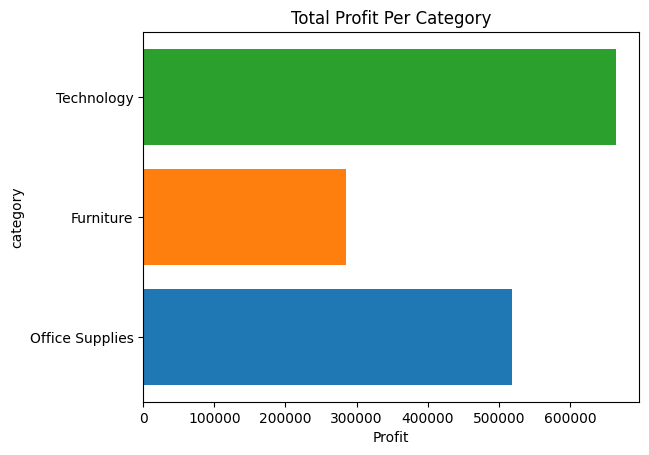

In [38]:
for category in ('Office Supplies', 'Furniture', 'Technology'):
  sql_statement = f"""
                    SELECT SUM(profit) AS total_profit, category
                    FROM GlobalSuper
                    WHERE category = '{category}'
                    GROUP BY category

                """

  profit_results2 = pd.read_sql_query(sql_statement, conn)
  profit_results2

  plt.barh(profit_results2['category'], profit_results2['total_profit'])
plt.xlabel('Profit')
plt.ylabel('category')
plt.title('Total Profit Per Category')
plt.show();

Technology had the highest total profit of the three categories, with office supplies in the middle, and furniture having the lowest total profit of the three. A possible reason for why technology had the highest total profit is that technology products are expensive, but also needed for consumers. For example, a mobile phones is expensive to buy, but a household might need four mobile phones for its members. Office supplies are also something that is needed for consumers, mainly companies and workplaces. It is possible that office supplies is in the middle because they are bought much more ofthen than furniture products, but are not as expensive as technology products. Furniture may have the lowest total profit because it is bought the least out of the three categories. Also, when a consumer buys furniture, they expect that it would last at minimum for a couple of years.

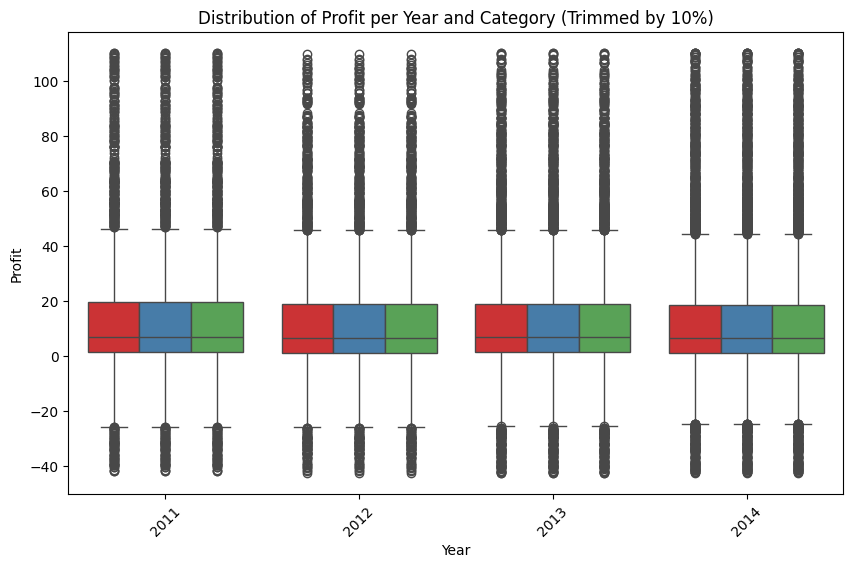

In [51]:
categories = ('Office Supplies', 'Furniture', 'Technology')
combined_data = pd.DataFrame()


for category in categories:
    ssql_statement = f"""

                    SELECT year, profit
                    FROM GlobalSuper
                    WHERE category = '{category}'
                          AND customer_id NOT IN
                                                (SELECT customer_id
                                                FROM GlobalSuper
                                                WHERE category = '{category}'
                                                ORDER BY profit DESC
                                                LIMIT 2500)

                          AND customer_id NOT IN
                                                (SELECT customer_id
                                                FROM GlobalSuper
                                                WHERE category = '{category}'
                                                ORDER BY profit ASC
                                                LIMIT 2500)

                    """
    prof_per_category = pd.read_sql_query(sql_statement, conn)

    # Add category column to the DataFrame
    prof_per_category['Category'] = category

    # Append the data to the combined DataFrame
    combined_data = pd.concat([combined_data, prof_per_category], ignore_index=True)

# Create a box plot using SNS import
sns.set_palette('Set1')
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(data=combined_data, x='year', y='profit', hue='Category', patch_artist=True, legend=False)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Distribution of Profit per Year and Category (Trimmed by 10%)')
plt.xticks(rotation=45)

plt.show();

In order from left to right for each box plot, it goes office supplies, funriture, and technology.

The reason for a box plot is to be able to make a graph from large group of numbers and know what numbers in the IQR. For this particular graph there are so many outliers, that is, orders that are outside of the box plot. This may be because there is just so many orders in the database, because this graph is looking at the 3 categories, which are assigned to every single order in the database. Now, looking at the actual box plot, it goes from a little under -20 profit to a little over 40 for profit. The inter quartile range is from a little over 0 profit to 20 profit.  So, what this means, is that 75% of the orders are in this range. These findings are pretty much the same for all four years. So, a couple of possible explanations for these findings: the extreme outliers may change but the average consumer behavior will stay the same, companies and customers are inclined to make decisions to benefit both of their interests.

For Phase 3 Grading:
    
* Who made this graph?  John Murphy
* Who asked the question?  Jacob Schaeffer
* Who did the write-up?  John Murphy
* Any other tasks someone did that you want to explain: Jacob helped John with the graph

Now that we have recieved a conrete understanding of what categories make the most profit, let's see if there is any correlations to be found when shipping these products...

### 3.3.1 -  Q: Is there a correlation between the sale size and the shipping cost?

This question goes into whether or not there is a correlation between the size of a sale and how much shipping cost there is. Does a increased sale value correlate to an increased shipping cost?

In [42]:
sql_statement = """
                    SELECT sales, shipping_cost
                    FROM GlobalSuper
                    WHERE market = 'APAC'
                    ORDER BY sales DESC



                """

s_to_s = pd.read_sql_query(sql_statement, conn)
s_to_s

,sales,shipping_cost
0,6999,413.80
1,6440,255.36
2,5760,187.19
3,5752,353.85
4,5738,261.87
...,...,...
10997,3,0.39
10998,3,0.52
10999,3,0.47
11000,3,0.40


In this code cell, we want to find how many total sales there were for the entire APAC.  We chose APAC because it was the largest of the six markets and gave us the most data to work with.


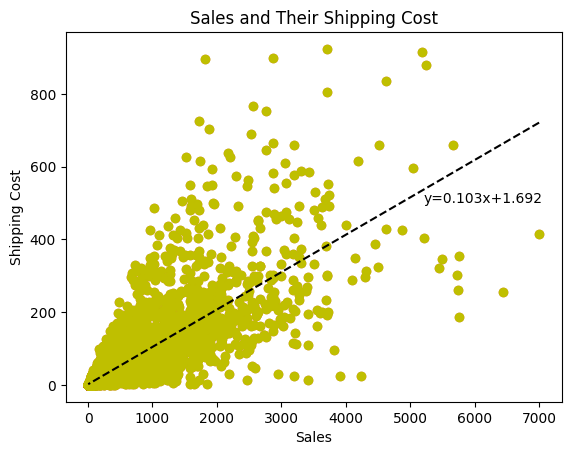

In [43]:
#creating regression line
y = s_to_s['shipping_cost']
x = s_to_s['sales']
coef = np.polyfit(x,y,1)
m = coef[0]
b = coef[1]
poly1d_fn = np.poly1d(coef)
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.text(5200,500,f'y={m:.3f}x+{b:.3f}')

plt.scatter(s_to_s['sales'], s_to_s['shipping_cost'], alpha=.5)
plt.title("Sales and Their Shipping Cost")
plt.xlabel('Sales')
plt.ylabel('Shipping Cost');

Here we have a scatter plot, that goes into depth with the sale sizes and the shipping cost for each sale made in the APAC region.  We wanted to find out if there was a direct correlation between the sale size and whether or not the shipping cost goes up or down based on the size.  Do companies want to pay a bigger price for their bigger orders or are there other factors for the orders being high?  Other factors being the fact the superstore spends more time, effort and resources getting the order done.  We also put a line of regression in the graph to show a general slope of the points in the graph.  There is also an r-squared value we calculated to see what the correlation is.

From the scatter plot, our group was able to determine that there is a very strong correlation that higher sales may effect shipping costs. This may be due to the order size requiring better means of transportation, or companies ordering high value products that they want delivered expeditiously.

For Phase 3 Grading:
    
* Who made this graph?  Alex Chase
* Who asked the question?  Alex Chase
* Who did the write-up?  Alex Chase
* Any other tasks someone did that you want to explain: No

Now to tie it all together, our group wanted to explore how an ecnomic factor may or may not correlate to sales amongst global superstores...

### 3.3.2 -  Q: Is there a correlation between Inflation Rate's and the numebr of sales?


This question explores whethere or not the Inflation Rate has any effect on the number of sales a country makes from global super stores.

In this code cell, we first want to use an innerjoin to combine our two tables: globalsuper and inflation rate. Then we selected our specified columns and included a group by to produce the following.

In [44]:
sql_statement = """SELECT gs.Country, ir_2011, ir_2012, ir_2013, ir_2014, sales
                   FROM InflationRate AS ir
                   INNER JOIN GlobalSuper AS gs
                   ON ir.Country = gs.Country
                   GROUP BY gs.Country;

                    """

ir_to_profit = pd.read_sql_query(sql_statement, conn)
ir_to_profit

,country,ir_2011,ir_2012,ir_2013,ir_2014,sales
0,Afghanistan,11.80,6.44,7.39,4.67,13
1,Albania,3.41,2.03,1.93,1.62,6
2,Algeria,5.74,9.70,4.10,3.88,5
3,Angola,13.48,10.28,8.78,7.30,5
4,Argentina,9.77,10.04,10.62,38.08,2
...,...,...,...,...,...,...
125,Uruguay,8.10,8.10,8.58,8.88,8
126,Uzbekistan,12.45,11.90,11.70,9.08,6
127,Vietnam,18.67,9.07,6.58,4.09,8
128,Zambia,6.44,6.59,6.99,7.82,6


Next, we utilized a scatter plot to demonstrate if there is any correlation between inflation rate and sales.

In the first graph we have a general scatter plot that displays the correlation and points across all data. Following this, we wanted to know if deflation would positvely effects sales. Would consumers feel more inclined to purchase if deflation were to occur? Finally, we created a third graph demonstrating only inflation rates. Would this potentially descrease the number of sales?

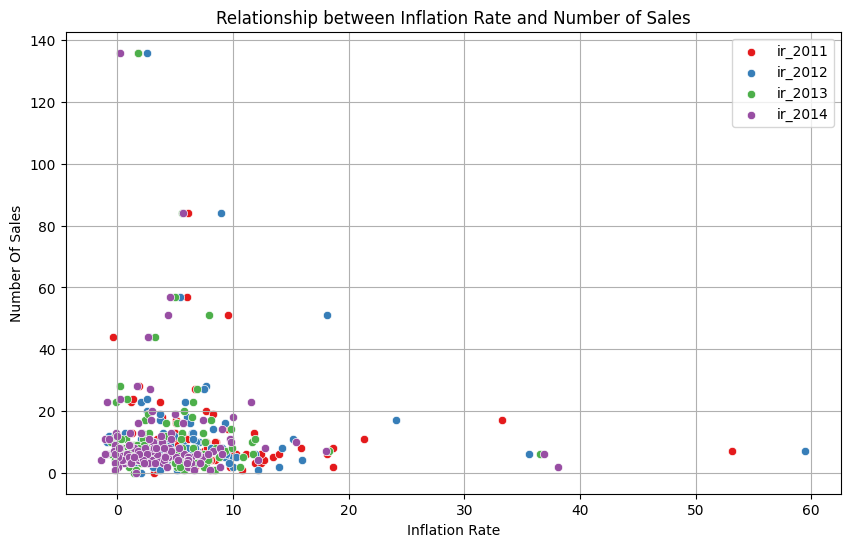

Correlation Coefficient between Inflation Rate and Profit Margin:
 ir_2011   -0.062020
ir_2012    0.034292
ir_2013   -0.008217
ir_2014   -0.054520
Name: sales, dtype: float64


In [52]:
#code for scatter plot
sql_statement = """SELECT gs.Country, ir_2011, ir_2012, ir_2013, ir_2014, sales
                   FROM InflationRate AS ir
                   INNER JOIN GlobalSuper AS gs
                   ON ir.Country = gs.Country
                   GROUP BY gs.Country

                    """

ir_to_profit = pd.read_sql_query(sql_statement, conn)
ir_to_profit

ir_to_profit.dropna(inplace=True)
#Iterating through a list to find each correlation coeffecient
correlation_coefficient = ir_to_profit[['ir_2011', 'ir_2012', 'ir_2013', 'ir_2014', 'sales']].corr().loc['sales', 'ir_2011':'ir_2014']

# Visualize the relationship between inflation rates and profit margins
#Using a for loop to iterate through the column options
plt.figure(figsize=(10, 6))
for year in ['ir_2011', 'ir_2012', 'ir_2013', 'ir_2014']:
    sns.scatterplot(data=ir_to_profit, x=year, y='sales', label=year)
plt.xlabel('Inflation Rate')
plt.ylabel('Number Of Sales')
plt.title('Relationship between Inflation Rate and Number of Sales')
plt.legend()
plt.grid(True)
plt.show()

print("Correlation Coefficient between Inflation Rate and Profit Margin:\n",correlation_coefficient);

Looking at the graph, our group discovered that there is an extremely weak correlation when looking at how inflation rates effect sales.
This may be due to a plethora of reasons, however, our group believes that this is due to the payroll of the companies that order from the store. Due to the fact that small to large corporations make these large purchases, they have a larger budget to afford such products.

For Phase 3 Grading:
    
* Who made this graph?  Jacob Schaeffer
* Who asked the question?  Jacob Schaeffer
* Who did the write-up?  Jacob Schaeffer
* Any other tasks someone did that you want to explain: No

## Conclusion

**In short, our group gained valuable insight regarding who the global leaders are when it comes to spending, which categories tend to yeild fruitful results and which categories tend to be not as profitable, and if the number of sales impact the cost of shipping.**

**Ultimately, we dsicoverd that the US is a leader in the number of sales by country but falls short in the market rankings. Additionally, we discover that technology tends to yield the highest profit margins and in some cases the lowest. Finally, we discovered that when the value of a sale is higher there tends to be an increase in the shipping cost.**